In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

C:\Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('D:/DataScience-master/Kaggle/heartDiseaseAnalysis/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
features = data.drop(['target'],axis=1)
target = data['target'].copy()

In [5]:
target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
X_train, X_test, y_train, y_test= train_test_split(features,target, test_size=0.3, random_state=0) 

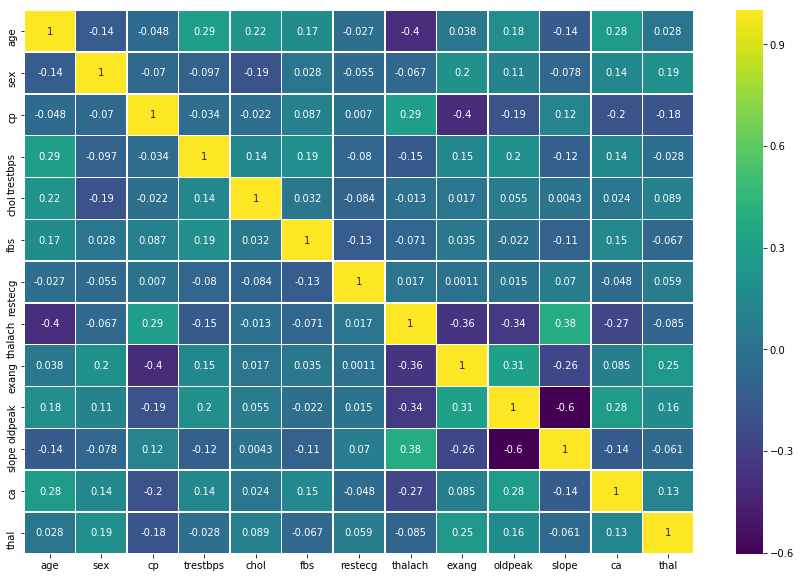

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [15]:
# Creating a decision tree classifier as the base model


#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=30,n_jobs=50,random_state=0, min_samples_leaf=100)

#Fitting on data
rf_clf.fit(X_train, y_train)

#Scoring the model on train data
score_rf=rf_clf.score(X_train, y_train)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_rf)



Training score: 0.56 
Testing score: 0.52 


In [16]:
rf_clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=2,
                            algorithm="SAMME.R",
                            learning_rate=0.5,
                            random_state=42)
ada_clf.fit(X_train,y_train)


yPredicted = ada_clf.predict(X_test)
yPredicted

ones = 0
zeros = 0
for i in yPredicted:
    if(i==1):
        ones=ones+1
    else:
        zeros=zeros+1
print('Ones = ',ones)
print('Zeros = ',zeros)

# Training Accureacy
print('Training Accuracy = ',ada_clf.score(X_train,y_train))

# Testing Accuracy
print('Testing Accuracy = ',ada_clf.score(X_test,y_test))

Ones =  68
Zeros =  23
Training Accuracy =  0.7688679245283019
Testing Accuracy =  0.7252747252747253
